In [6]:
#loading survival package
library(survival)
mydata=read.csv("D:/Dropbox/Data Science and Analytics/worksheet.csv")
attach(mydata)



The following objects are masked from mydata (pos = 3):

    Customer_id, Last_response_Tag, Months, Platinum_flag, Purchase_2k



In [13]:
Cust<-Customer_id
l_resp<-Last_response_Tag
Plat<-Platinum_flag
span<-Months
resp<-Purchase_2k
X<-cbind(l_resp,Plat)
#X

Call: survfit(formula = Surv(span, resp) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    237      11    0.954  0.0137        0.927        0.981
    2    216      12    0.901  0.0197        0.863        0.940
    3    193       9    0.859  0.0232        0.814        0.905
    4    165       7    0.822  0.0260        0.773        0.875
    5    150       7    0.784  0.0285        0.730        0.842
    6    134       7    0.743  0.0310        0.685        0.806
    7    116      11    0.672  0.0346        0.608        0.744
    8     92      11    0.592  0.0380        0.522        0.671
    9     69      12    0.489  0.0414        0.414        0.577
   10     53       8    0.415  0.0426        0.340        0.508
   11     35      10    0.297  0.0439        0.222        0.397
   12     18       7    0.181  0.0434        0.113        0.290

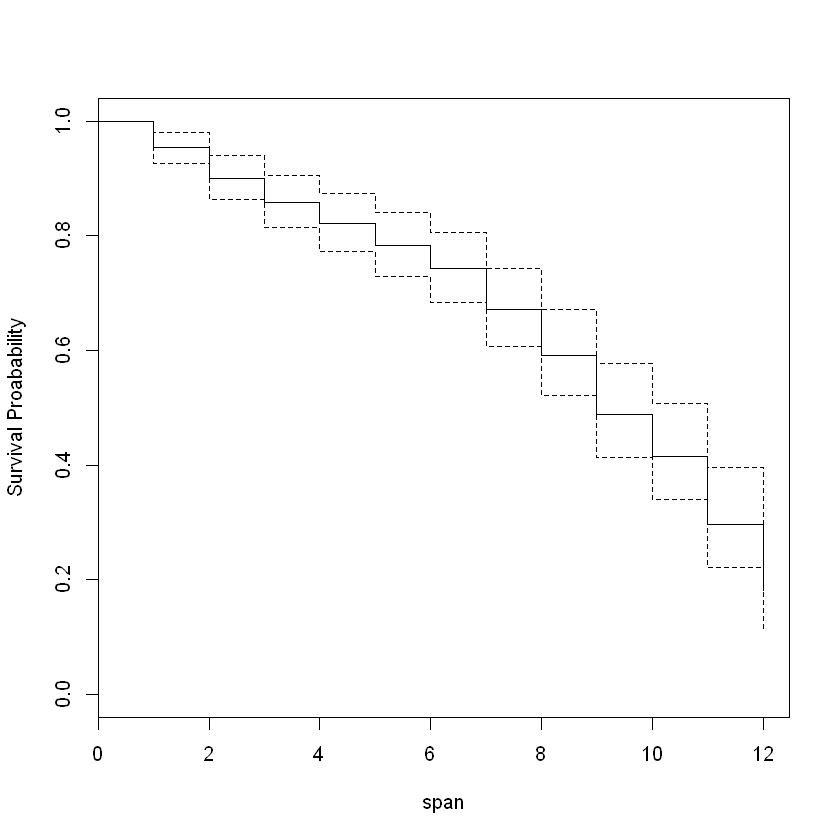

In [14]:
#Non-parametric solution
kmsurv<-survfit(Surv(span,resp)~1)
summary(kmsurv)
plot(kmsurv,xlab = "span",ylab="Survival Proabability")

Call: survfit(formula = Surv(span, resp) ~ group1)

                group1=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    131       3    0.977  0.0131       0.9518        1.000
    2    122       8    0.913  0.0251       0.8652        0.964
    3    106       4    0.879  0.0295       0.8227        0.938
    4     96       4    0.842  0.0334       0.7789        0.910
    5     86       5    0.793  0.0380       0.7219        0.871
    6     76       3    0.762  0.0406       0.6862        0.846
    7     68       6    0.695  0.0453       0.6111        0.789
    8     53       7    0.603  0.0509       0.5108        0.711
    9     39       5    0.525  0.0549       0.4283        0.645
   10     33       6    0.430  0.0571       0.3314        0.558
   11     20       7    0.279  0.0590       0.1848        0.423
   12      8       3    0.175  0.0604       0.0887        0.344

                group1=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI

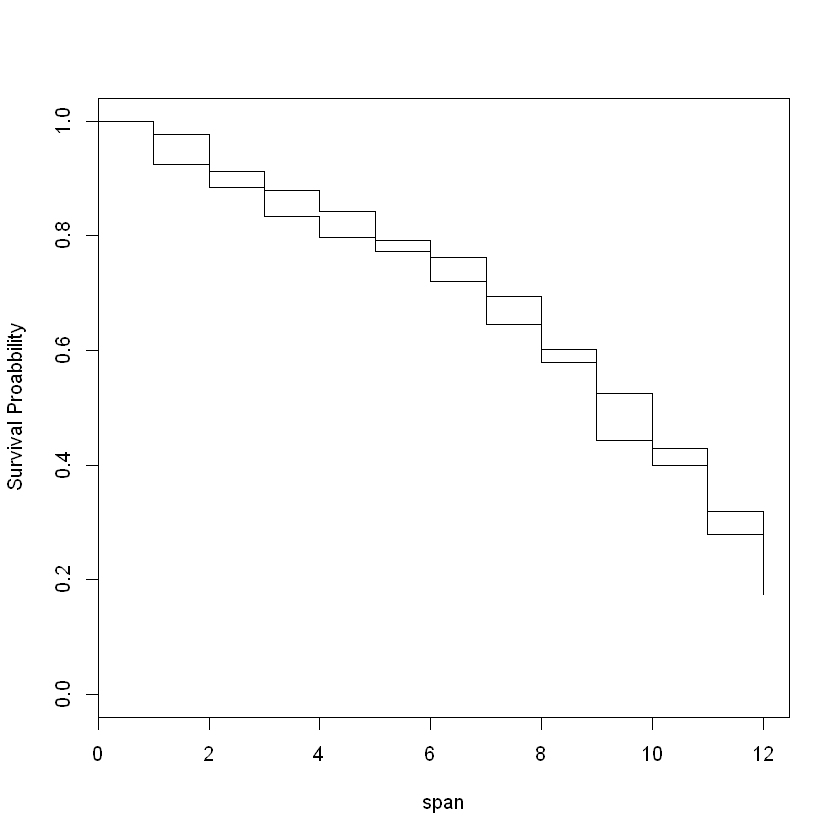

In [16]:
group1 <- l_resp
group2 <- Plat
kmsurv1<-survfit(Surv(span,resp)~group1)
summary(kmsurv1)
plot(kmsurv1,xlab = "span",ylab="Survival Proabbility")


Call: survfit(formula = Surv(span, resp) ~ group2)

                group2=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    117       7   0.9402  0.0219      0.89816        0.984
    2    104       4   0.9040  0.0275      0.85160        0.960
    3     96       4   0.8663  0.0322      0.80548        0.932
    4     80       3   0.8339  0.0360      0.76612        0.908
    5     74       4   0.7888  0.0405      0.71321        0.872
    6     63       3   0.7512  0.0440      0.66971        0.843
    7     56       5   0.6841  0.0493      0.59410        0.788
    8     42       7   0.5701  0.0569      0.46889        0.693
    9     30       7   0.4371  0.0620      0.33107        0.577
   10     22       4   0.3576  0.0621      0.25440        0.503
   11     15       7   0.1907  0.0567      0.10645        0.342
   12      5       4   0.0381  0.0360      0.00601        0.242

                group2=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI

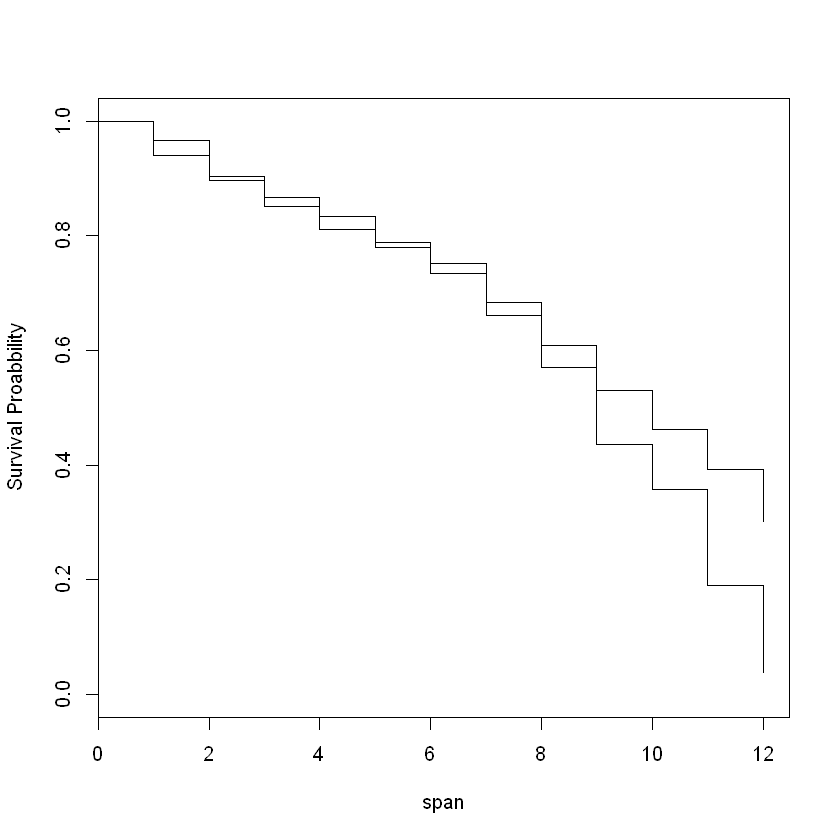

In [17]:
kmsurv2<-survfit(Surv(span,resp)~group2)
summary(kmsurv2)
plot(kmsurv2,xlab = "span",ylab="Survival Proabbility")


In [19]:
coxph <- coxph(Surv(span,resp)~X,method ="breslow")
summary(coxph)

Call:
coxph(formula = Surv(span, resp) ~ X, method = "breslow")

  n= 237, number of events= 112 

           coef exp(coef) se(coef)      z Pr(>|z|)
Xl_resp  0.1166    1.1237   0.1915  0.609    0.543
XPlat   -0.3062    0.7362   0.1919 -1.596    0.111

        exp(coef) exp(-coef) lower .95 upper .95
Xl_resp    1.1237     0.8899    0.7720     1.635
XPlat      0.7362     1.3582    0.5055     1.072

Concordance= 0.525  (se = 0.033 )
Rsquare= 0.011   (max possible= 0.987 )
Likelihood ratio test= 2.73  on 2 df,   p=0.255
Wald test            = 2.73  on 2 df,   p=0.256
Score (logrank) test = 2.74  on 2 df,   p=0.2539
